In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
train_data=pd.read_csv('/Users/surajchoudhary/Documents/Kaggel/TitanicSurviver/train.csv')
test_data=pd.read_csv('/Users/surajchoudhary/Documents/Kaggel/TitanicSurviver/test.csv')

In [16]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Checking Missing values in train_data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Filling missing data
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

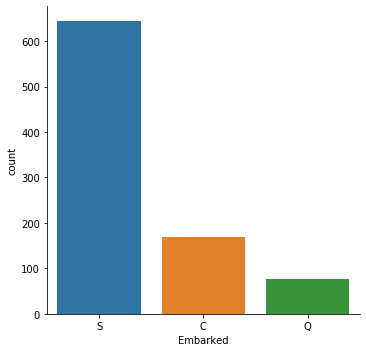

In [20]:
sns.catplot(x='Embarked',kind = 'count',data = train_data)

In [21]:
train_data['Embarked']=train_data['Embarked'].fillna('S')# Assigning S because most data belong to that.

In [22]:
group=train_data.groupby('Cabin')
group.count()
train_data['Cabin']=train_data['Cabin'].fillna('Missing')

In [23]:
# Checking Missing values in train_data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
#checking survival data

In [60]:
#By Gender
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [61]:
#By Passenger Class
train_data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [62]:
#By Embarked location
#The outward route was to be Southampton, England –> Cherbourg, France –> Queenstown, Ireland –> New York, USA
train_data[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [63]:
# Age Groups
#Group A: 0-5
#Group B: 6-18
#Group C: 18-30
#Group D: 31-45
#Group E: 45-60
#Group F: above 60    
#train_data

train_data['Age']=train_data['Age'].astype(int) # Convert float to int
train_data.loc[(train_data['Age']<=5),'Age Group']='Group A'
train_data.loc[(train_data['Age']>=6) & (train_data['Age']<=18),'Age Group']='Group B'
train_data.loc[(train_data['Age']>=18) & (train_data['Age']<=30),'Age Group']='Group C'
train_data.loc[(train_data['Age']>=31) & (train_data['Age']<=45),'Age Group']='Group D'
train_data.loc[(train_data['Age']>=45) & (train_data['Age']<=60),'Age Group']='Group E'
train_data.loc[(train_data['Age']>60),'Age Group']='Group F'

In [55]:
train_data[['Age Group','Survived']].groupby(['Age Group']).mean()

,Survived
Age Group,
Group A,0.704545
Group B,0.434783
Group C,0.330526
Group D,0.430851
Group E,0.408602
Group F,0.227273


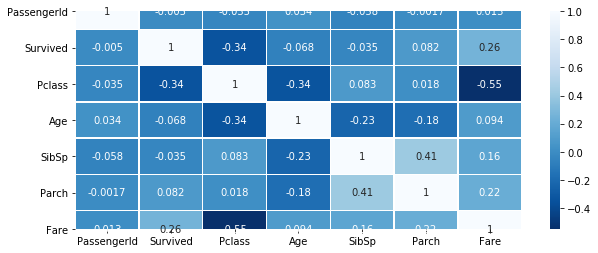

In [76]:
plt.subplots(figsize=(10,4))
sns.heatmap(train_data.corr(),annot=True,cmap='Blues_r',linewidths=.5)